In [23]:
#!pip install scikitplot
#!pip install xgboost

In [1]:
import pandas as pd
import numpy as np

C:\Users\kansahi3\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
data_df = pd.read_csv('Data.csv')

In [3]:
data_df.sample(5)

,donor_id,donor_name,age_at_first_tbi,cerad,num_tbi_w_loc,act_demented,braak,structure_id,structure_acronym,ihc_a_syn,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
164,309335477,H14.09.040,0,1,0,Dementia,6,10208,PCx,0.000046,...,0.30,64.36,4.481550,0.142998,0.76,23.48,5.910375,18.20,37.26,378.241975
55,309335456,H14.09.019,78,3,1,No Dementia,6,10208,PCx,0.000080,...,0.34,14.48,0.555312,0.055322,0.00,8.64,3.298700,4.92,12.64,517.485937
311,326765678,H14.09.091,21,3,1,Dementia,6,10557,FWM,0.000038,...,0.30,35.86,0.736100,0.040712,0.76,61.54,3.019025,9.74,21.52,491.566661
196,326765678,H14.09.091,21,3,1,Dementia,6,10235,TCx,0.000095,...,0.00,77.22,2.284100,0.050000,0.66,146.46,0.050000,14.76,24.00,457.480237
286,467056408,H15.09.109,33,2,1,Dementia,4,10208,PCx,0.000112,...,0.00,169.20,0.778487,0.070626,1.18,41.73,2.201435,19.62,11.11,632.000850


In [4]:
data_df.describe()

,donor_id,age_at_first_tbi,cerad,num_tbi_w_loc,braak,structure_id,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
count,3.770000e+02,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,356.000000,361.000000,377.000000,...,332.000000,332.000000,332.000000,321.000000,332.000000,332.000000,323.000000,332.000000,332.000000,332.000000
mean,3.271941e+08,20.445623,1.541114,0.583554,3.519894,10322.625995,0.000335,0.004432,0.011097,0.015838,...,0.795361,42.729658,33.144032,0.154011,0.632349,26.619313,4.845273,25.512727,14.670538,258.773277
std,3.901759e+07,30.162553,1.081288,0.710143,1.659996,137.815791,0.001356,0.004465,0.012424,0.026660,...,1.324740,45.870499,147.776783,0.208821,0.861855,37.341109,7.967863,70.918107,12.449364,223.600929
min,3.093354e+08,0.000000,0.000000,0.000000,0.000000,10208.000000,0.000002,0.000395,0.000264,0.000018,...,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007737
25%,3.093355e+08,0.000000,1.000000,0.000000,2.000000,10235.000000,0.000053,0.002004,0.001662,0.000122,...,0.000000,13.832500,0.528637,0.060000,0.000000,5.910000,0.430000,8.090000,3.845000,0.766814
50%,3.093355e+08,0.000000,2.000000,0.000000,3.000000,10235.000000,0.000078,0.003002,0.004298,0.001033,...,0.300000,27.135000,0.782950,0.089723,0.380000,17.635000,3.360730,11.805000,13.155000,302.568156
75%,3.267657e+08,23.000000,2.000000,1.000000,5.000000,10294.000000,0.000140,0.004623,0.017452,0.018633,...,1.160000,52.780000,1.785164,0.169792,0.782500,29.755000,5.518495,19.195000,20.775000,457.679320
max,4.670564e+08,89.000000,3.000000,3.000000,6.000000,10557.000000,0.015626,0.037957,0.054697,0.112065,...,13.780000,337.660000,995.098406,2.556488,6.480000,261.180000,103.414740,789.640000,69.940000,651.530050


In [5]:
data_df = data_df.drop(['donor_id', 'structure_acronym'], axis = 1)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   donor_name             377 non-null    object 
 1   age_at_first_tbi       377 non-null    int64  
 2   cerad                  377 non-null    int64  
 3   num_tbi_w_loc          377 non-null    int64  
 4   act_demented           377 non-null    object 
 5   braak                  377 non-null    int64  
 6   structure_id           377 non-null    int64  
 7   ihc_a_syn              377 non-null    float64
 8   ihc_tau2_ffpe          356 non-null    float64
 9   ihc_at8_ffpe           361 non-null    float64
 10  ihc_at8                377 non-null    float64
 11  ihc_ptdp_43_ffpe       362 non-null    float64
 12  ihc_a_beta_ffpe        355 non-null    float64
 13  ihc_a_beta             377 non-null    float64
 14  ihc_iba1_ffpe          363 non-null    float64
 15  ihc_gf

In [7]:
data_df = data_df.fillna(0)

In [8]:
data_df["donor_name"] = data_df["donor_name"].astype(str)
data_df["act_demented"] = data_df["act_demented"].astype(str)


In [9]:
#df.replace({'A': {0: 100, 4: 400}})
data_df = data_df.replace({'act_demented': {'No Dementia': 0, 'Dementia': 1}})
#data_df = data_df.replace('Dementia', 1)

In [10]:
data_df.describe()

,age_at_first_tbi,cerad,num_tbi_w_loc,act_demented,braak,structure_id,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,...,377.000000,377.000000,377.000000,377.000000,377.00000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,20.445623,1.541114,0.583554,0.477454,3.519894,10322.625995,0.000335,0.004185,0.010626,0.015838,...,0.700424,37.629301,29.187848,0.131134,0.55687,23.441941,4.151255,22.467441,12.919413,227.885220
std,30.162553,1.081288,0.710143,0.500155,1.659996,137.815791,0.001356,0.004456,0.012362,0.026660,...,1.269479,45.218527,139.068938,0.200299,0.83429,36.085486,7.566885,67.052661,12.614333,225.989600
min,0.000000,0.000000,0.000000,0.000000,0.000000,10208.000000,0.000002,0.000000,0.000000,0.000018,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,2.000000,10235.000000,0.000053,0.001868,0.001494,0.000122,...,0.000000,10.700000,0.361969,0.046742,0.00000,2.200000,0.090000,6.000000,0.600000,0.328562
50%,0.000000,2.000000,0.000000,0.000000,3.000000,10235.000000,0.000078,0.002784,0.003695,0.001033,...,0.000000,22.820000,0.731019,0.080000,0.28000,13.750000,2.948190,10.440000,11.640000,194.211638
75%,23.000000,2.000000,1.000000,1.000000,5.000000,10294.000000,0.000140,0.004539,0.017267,0.018633,...,1.000000,46.380000,1.519050,0.146587,0.76000,27.220000,5.200680,17.980000,18.870000,448.095050
max,89.000000,3.000000,3.000000,1.000000,6.000000,10557.000000,0.015626,0.037957,0.054697,0.112065,...,13.780000,337.660000,995.098406,2.556488,6.48000,261.180000,103.414740,789.640000,69.940000,651.530050


In [11]:
# explore corelation
corr=data_df.corr(method='pearson')
corr

,age_at_first_tbi,cerad,num_tbi_w_loc,act_demented,braak,structure_id,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
age_at_first_tbi,1.000000,0.039965,0.577734,0.043860,0.127782,-0.004250,-0.014093,0.066657,0.035519,0.027013,...,0.003604,-0.011375,-0.016367,0.016277,-0.071832,-0.023983,0.093884,0.017286,0.045054,-0.057447
cerad,0.039965,1.000000,0.013698,0.243918,0.610379,0.012570,0.015251,0.294845,0.415377,0.334104,...,0.046681,0.031784,0.097252,-0.006620,-0.023059,0.091491,0.043872,0.053923,0.055917,0.585262
num_tbi_w_loc,0.577734,0.013698,1.000000,0.022166,0.060065,-0.008471,-0.023657,0.005401,0.012925,-0.036932,...,0.012735,-0.004817,-0.069180,-0.040440,-0.074838,-0.024589,0.006397,0.002057,0.016934,-0.159451
act_demented,0.043860,0.243918,0.022166,1.000000,0.366521,0.002559,0.063432,0.262474,0.290756,0.298723,...,-0.035170,0.051819,0.050692,-0.045474,-0.037966,0.130078,0.063763,-0.013537,0.063993,0.132795
braak,0.127782,0.610379,0.060065,0.366521,1.000000,0.016651,-0.055205,0.309663,0.462981,0.407075,...,-0.061126,0.026834,0.021925,0.070946,-0.041339,0.045089,0.101844,-0.065935,0.031727,0.449640
structure_id,-0.004250,0.012570,-0.008471,0.002559,0.016651,1.000000,-0.069912,-0.153821,-0.240722,-0.175129,...,0.032582,-0.077872,-0.062084,-0.115122,-0.037773,0.091593,0.011423,-0.068833,0.076400,-0.027490
ihc_a_syn,-0.014093,0.015251,-0.023657,0.063432,-0.055205,-0.069912,1.000000,0.056749,0.038865,0.002820,...,-0.080008,-0.072335,-0.032321,0.444869,0.003418,-0.067408,0.065900,0.032897,-0.089666,0.000545
ihc_tau2_ffpe,0.066657,0.294845,0.005401,0.262474,0.309663,-0.153821,0.056749,1.000000,0.652470,0.630805,...,-0.109657,0.019918,0.151125,0.098178,-0.049533,-0.083535,0.173760,0.059974,-0.089158,0.168835
ihc_at8_ffpe,0.035519,0.415377,0.012925,0.290756,0.462981,-0.240722,0.038865,0.652470,1.000000,0.751885,...,-0.161955,0.044141,0.112981,0.223043,0.026450,-0.062716,0.231621,0.093246,-0.201201,0.233986
ihc_at8,0.027013,0.334104,-0.036932,0.298723,0.407075,-0.175129,0.002820,0.630805,0.751885,1.000000,...,-0.172017,-0.021328,0.219947,0.203525,0.025842,-0.055765,0.257044,0.156880,-0.235001,0.179467


In [12]:
data_df.dtypes

donor_name                object
age_at_first_tbi           int64
cerad                      int64
num_tbi_w_loc              int64
act_demented               int64
braak                      int64
structure_id               int64
ihc_a_syn                float64
ihc_tau2_ffpe            float64
ihc_at8_ffpe             float64
ihc_at8                  float64
ihc_ptdp_43_ffpe         float64
ihc_a_beta_ffpe          float64
ihc_a_beta               float64
ihc_iba1_ffpe            float64
ihc_gfap_ffpe            float64
ptau_ng_per_mg           float64
vegf_pg_per_mg           float64
ab42_over_ab40_ratio     float64
tnf_a_pg_per_mg          float64
tau_ng_per_mg            float64
il_10_pg_per_mg          float64
isoprostane_pg_per_mg    float64
il_6_pg_per_mg           float64
il_1b_pg_per_mg          float64
ptau_over_tau_ratio      float64
il_4_pg_per_mg           float64
rantes_pg_per_mg         float64
ab40_pg_per_mg           float64
a_syn_pg_per_mg          float64
ifn_g_pg_p

In [13]:
X=data_df.drop(['donor_name', 'act_demented'], axis = 1)
X.head()

,age_at_first_tbi,cerad,num_tbi_w_loc,braak,structure_id,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
0,0,3,0,3,10557,0.000078,0.002358,0.001137,0.000110,0.001259,...,2.68,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251
1,83,0,1,0,10208,0.000063,0.002762,0.001272,0.000164,0.002354,...,3.02,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875
2,0,3,0,5,10557,0.000064,0.003468,0.013787,0.016023,0.001708,...,0.80,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514
3,89,2,1,3,10557,0.000049,0.003035,0.001707,0.000137,0.001729,...,1.30,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571
4,89,2,1,3,10235,0.000080,0.002088,0.004489,0.000062,0.001513,...,0.00,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263


In [14]:
y = data_df['act_demented']
y.head()

0    0
1    1
2    1
3    0
4    0
Name: act_demented, dtype: int64

# To automate, split data into test and train datasets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((301, 34), (301,), (76, 34), (76,))

In [17]:
from sklearn.preprocessing import StandardScaler  #Normalizer

normalizer = StandardScaler() # Normalizer()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# degree = 1 #3
# poly = PolynomialFeatures(degree)
# x_train_t = poly.fit_transform(X_train)
# x_test_t = poly.fit_transform(X_test)

In [31]:
from sklearn import linear_model # LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import metrics # r2_score, mae, mse

# Model selection using default setting
models = dict(
    ridgeReg = linear_model.Ridge(), 
    # ridgeReg = linear_model.Ridge(alpha=0.2, max_iter=100000), 
    ols = linear_model.LinearRegression(), 
    sgdReg = linear_model.SGDRegressor(random_state=42),
    lassoReg = linear_model.Lasso(), 
    bayesianReg = linear_model.BayesianRidge(),
    #logReg = LogisticRegression(penalty='l1',C=0.1),
    
    xgbClassifier = XGBClassifier(max_depth=2,gamma=2,eta=0.8,reg_alpha=0.5,reg_lambda=0.5),
    
     #= linear_model.RANSACRegressor(random_state=42), #robust to outliers? 0.44
    # ransactReg = linear_model.RANSACRegressor(min_samples=5000, max_trials=10000, loss='absolute_error', random_state=42), # 0.59
    #svmReg = SVR(), # running forever
    decisionTree = DecisionTreeRegressor(max_depth=3, random_state = 42),
    # randomForestReg = RandomForestRegressor(max_depth=3, random_state = 42), 
    randomForestReg = RandomForestRegressor(max_depth=11, n_estimators = 80,  random_state = 42),    
    adaBoostReg = AdaBoostRegressor(n_estimators=10, random_state=42),
    # adaBoostReg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100, random_state=42),
    knn = KNeighborsRegressor()
)


In [32]:
def train_eval_model(modeldef, modelname, X_train, X_test, y_train, y_test):
    mod = modeldef[modelname]
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)

    # model evaluation
    r2_train = mod.score(X_train, y_train)
    r2_test = mod.score(X_test, y_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    # r2 = metrics.r2_score(y_test, y_pred)  # same as r2_test  

    additn = None
    # for linear model
    if modelname in ['ols', 'ridgeReg', 'sgdReg', 'lassoReg', 'bayesianReg', 'svmReg', 'logReg']:
        additn = mod.coef_, mod.intercept_
    elif modelname in ['decisionTree', 'randomForestReg', 'xgbClassifier']:
        additn = mod.feature_importances_
    elif modelname in ['adaBoostReg']:
        additn = mod.n_features_in_

    return r2_train, r2_test, mae, mse, additn

In [33]:
scores = {}
# all models
for model in models:
    scores[model] = train_eval_model(models, model, X_train_norm, X_test_norm, y_train, y_test)

# just test one model
# scores['sgdReg']= train_eval_model(models, 'sgdReg', X_train_norm, X_test_norm, y_train, y_test)
# scores

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [34]:
df_score = pd.DataFrame(scores).T
df_score.columns=['Train R2', 'Test R2', 'MAE', 'MSE','other']
# df_score.drop(['MSE', 'other'], axis=1, inplace=True)
df_score

,Train R2,Test R2,MAE,MSE,other
ridgeReg,0.322941,-0.24316,0.482159,0.303042,"([-0.009116280373163432, -0.05806996361790365,..."
ols,0.323001,-0.256195,0.483583,0.306219,"([-0.00918259270496511, -0.060242611407567905,..."
sgdReg,0.313782,-0.093768,0.463434,0.266625,"([-0.010865574970931982, -0.035138328780999456..."
lassoReg,0.0,-0.020471,0.498689,0.248758,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
bayesianReg,0.280278,-0.004667,0.457874,0.244905,"([-0.0017877865480160154, -0.00208804057122523..."
xgbClassifier,0.92691,0.644737,0.355263,0.355263,"[0.0, 0.07261971, 0.0, 0.17839985, 0.0, 0.0275..."
decisionTree,0.41024,0.138717,0.357218,0.209953,"[0.0, 0.13861546116225362, 0.0, 0.331240490962..."
randomForestReg,0.903279,0.250918,0.379673,0.182602,"[0.01764212624672781, 0.06072190228247244, 0.0..."
adaBoostReg,0.600413,0.251801,0.372187,0.182386,34.0
knn,0.384814,-0.155114,0.444737,0.281579,NaN


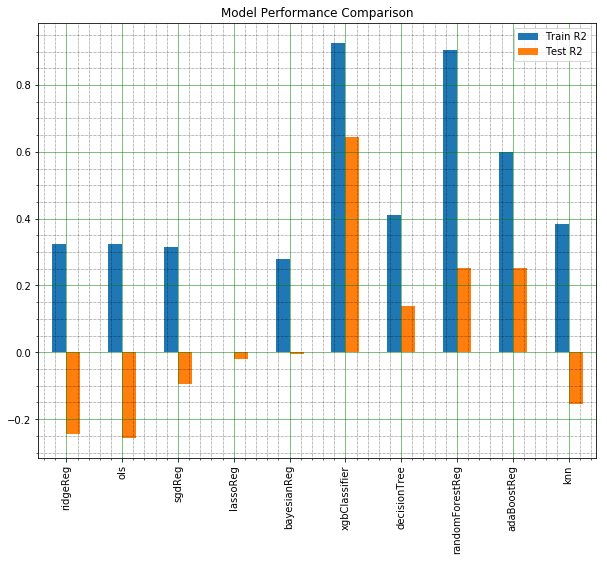

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0)
df_score.plot(y=['Train R2', 'Test R2'], kind="bar", title="Model Performance Comparison")
# df_score.plot(y=['Train R2', 'Test R2'], kind="line", title="Model Performance Comparison")
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

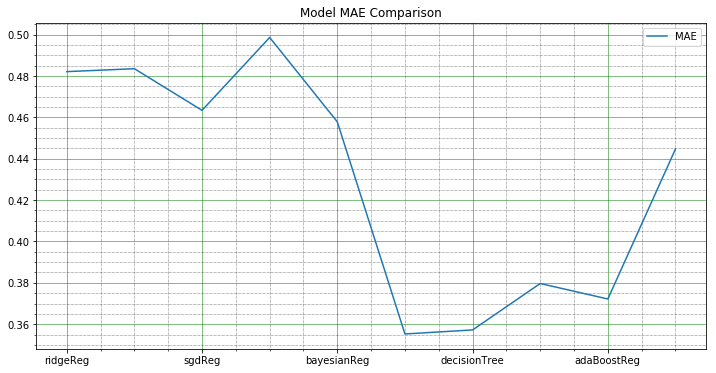

In [36]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
df_score.plot(y=['MAE'], kind="line", title="Model MAE Comparison")
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

In [ ]:
# 'ridgeReg': (0.6314012208697268,  0.6204769666486525,  195.74509910905655,  344745.0172528329,
#   (array([  0.80608837, -20.26069704,  -8.28046446,   2.16295502,
#            -6.56336537, 705.10094832, -20.55168314,   7.35865668,
#            24.64124575, 104.3299739 ,   9.90542323]),   320.34468208940035)),
#  'ols': (0.6314012208816919,  0.6204771187863705,  195.74522721375536,  344744.87905642425,
#   (array([  0.80608586, -20.26060994,  -8.28053347,   2.16300218,
#            -6.56327725, 705.10406815, -20.55195039,   7.35864484,
#            24.64108571, 104.33029678,   9.90543948]),   320.34468208940035)),
#  'sgdReg': (0.6037396878542137,  0.6020016708011291,  201.4830248978967,  361527.30877664994,
#   (array([  4.22579901, -15.948037  ,  13.25442037,   3.80025061,
#            -7.26072894, 855.67408804, -28.37741195,   6.90696038,
#            13.51861946,  97.7895985 ,  10.03267611]),   array([329.45764764]))),
#  'lassoReg': (0.6313851908912874,  0.6204410148042181,  195.04300542723905,  344777.67460993817,
#   (array([ 0.00000000e+00, -1.89652276e+01, -7.23218594e+00,  2.95267687e-01,
#           -5.55707688e+00,  7.04300563e+02, -1.90640036e+01,  5.65315084e+00,
#            2.31619230e+01,  1.03499395e+02,  8.83408819e+00]),   320.34468208940035)),
#  'bayesianReg': (0.6314012203654131,  0.6204761190227912,  195.7443858411429,  344745.78720555385,
#   (array([  0.80610235, -20.26118206,  -8.28008027,   2.16269241,
#            -6.56385597, 705.08357471, -20.55019489,   7.35872264,
#            24.64213692, 104.32817581,   9.90533277]),   320.34468208940035)),
#  'ransactReg': (0.4496305507850554,  0.43901421893650006,  204.02026308487692,  509579.2238577806,  None),
#  'decisionTree': (0.6433538657296066,  0.6336612240993403,  217.66328405567376,  332768.91392606753,
#   array([0.        , 0.        , 0.        , 0.        , 0.        ,
#          0.95085782, 0.        , 0.        , 0.04914218, 0.        ,         0.        ])),
#  'randomForestReg': (0.8325259277275661,  0.6934015607569104,  152.19880022077243,  278502.9495922564,  11),
#  'adaBoostReg': (-0.2617016052117902,  -0.22076174294630024,  365.7449070247924,  1108895.8802245157,  11),
#  'knn': (0.7861539679543617,  0.6584048108670809,  161.06947474449828,  310292.73330583953,  None)

In [25]:
# Top 2 Models Tuning
models_selected=dict(
    # decisionTree = DecisionTreeRegressor(criterion="absolute_error", max_depth=3, max_features='sqrt', n_jobs=-1, random_state = 42),
    #decisionTree = DecisionTreeRegressor(max_depth=9, random_state = 42),    
    #knn=KNeighborsRegressor(n_neighbors=37, weights='distance', n_jobs=-1),
    xgbClassifier = XGBClassifier(max_depth=2,gamma=2,eta=0.8,reg_alpha=0.5,reg_lambda=0.5)
    randomForestReg = RandomForestRegressor(max_depth=11, n_estimators = 80, criterion="absolute_error", random_state = 42),
)

In [26]:
def decision_tree_params(X_train, X_test, y_train, y_test):
    score = [0,0]
    for k in range(1,10):
        mod = DecisionTreeRegressor(max_depth=k, random_state = 42)
        mod.fit(X_train, y_train)
        kscore = mod.score(X_test, y_test)
        # print(k, type(s), s)
        if kscore > score[1]:
            score = [k, kscore, mod.score(X_train, y_train)]
    return score

decision_tree_params(X_train, X_test, y_train, y_test)

#[9, 0.11737610475612792, 0.15911322321093413]

[3, 0.22756147720795472, 0.4256788198305135]

In [27]:
def knn_params(X_train, X_test, y_train, y_test):
    score = [0,0]
    for k in range(1,38):
        mod = KNeighborsRegressor(n_neighbors=k, weights='distance', n_jobs=-1)
        mod.fit(X_train, y_train)
        kscore = mod.score(X_test, y_test)
        # print(k, type(s), s)
        if kscore > score[1]:
            score = [k, kscore, mod.score(X_train, y_train)]
    return score

knn_params(X_train, X_test, y_train, y_test)

# [37, 0.2808917930169397, 0.9128599161813027]

[0, 0]

In [37]:
def xgb_Classifier(X_train, X_test, y_train, y_test):
    score = [0,0]
    for k in range(1,10):
        mod = XGBClassifier(max_depth=k,gamma=2,eta=0.8,reg_alpha=0.5,reg_lambda=0.5)
        mod.fit(X_train, y_train)
        kscore = mod.score(X_test, y_test)
        # print(k, type(s), s)
        if kscore > score[1]:
            score = [k, kscore, mod.score(X_train, y_train)]
    return score

xgb_Classifier(X_train, X_test, y_train, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[3, 0.6973684210526315, 0.9568106312292359]

In [28]:
def random_forest_params(X_train, X_test, y_train, y_test):
    score = [0,0,0]
    decreases = 0
    for k in range(1,20):
        mod = RandomForestRegressor(max_depth=k, random_state = 42)
        mod.fit(X_train, y_train)
        kscore = mod.score(X_test, y_test)
        if kscore > score[1]:
            score = [k, kscore, mod.score(X_train, y_train)]
        else:
            decreases += 1
        if decreases > 3:
            break
    return score

random_forest_params(X_train_norm, X_test_norm, y_train, y_test)
# max_depth, test score, train score
#[19, 0.2320061147782816, 0.5694056470438422]


[9, 0.2628549877271962, 0.8912992528106776]

In [29]:
def random_forest_params2(X_train, X_test, y_train, y_test):
    score = [0,0,0]
    decreases = 0
    for d in range(1,20):
        for e in range(10,500):
            mod = RandomForestRegressor(max_depth=d, n_estimators=e, random_state = 42)
            mod.fit(X_train, y_train)
            testscore = mod.score(X_test, y_test)
            if testscore > score[2]:
                score = [d, e, testscore]
                decreases = 0
            else:
                decreases += 1
            if decreases > 5:
                break
                
    # find train score for selected parameter
    mod = RandomForestRegressor(max_depth=score[0], n_estimators=score[1], random_state = 42)
    mod.fit(X_train, y_train)
    trainscore = mod.score(X_train, y_train)
    score = [trainscore, score[2], score[0], score[1]]
    
    return score

random_forest_params2(X_train_norm, X_test_norm, y_train, y_test)
# train score, test score, max_depth, n_estimators
# [0.8518912651518963, 0.24505036013679848, 9, 11]

[0.8518912651518963, 0.24505036013679848, 9, 11]

In [38]:
from sklearn.model_selection import GridSearchCV

def random_forest_search(X_train, X_test, y_train, y_test):
    mod = RandomForestRegressor(max_depth=9, random_state = 42, n_estimators=11, n_jobs=-1)
    param_grid = { 
        'n_estimators': [10, 20, 50, 80, 90, 100, 300],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [5,6,7,8,9,10,11,12],
#         'criterion' :['squared_error', 'absolute_error', 'poisson']
        'criterion' :['mse', 'poisson']
    }
    grid = GridSearchCV(estimator=mod, param_grid=param_grid, cv= 5)
    grid.fit(X_train, y_train)

    return grid.best_score_, grid.best_params_

#random_forest_search(X_train_norm, X_test_norm, y_train, y_test)
# running for hours
# 0.6963683409469337, {'criterion': 'mse',  'max_depth': 8,  'max_features': 'auto',  'n_estimators': 300}

In [39]:
# best performance model
from sklearn.model_selection import cross_val_score

# mod = RandomForestRegressor(max_depth=8, n_estimators=300, max_features='auto', random_state = 42)                  
# mod = RandomForestRegressor(max_depth=8, n_estimators=10, max_features='auto', criterion='mse', random_state = 42)  
# mod = RandomForestRegressor(max_depth=8, random_state = 42)                                                         
# mod = RandomForestRegressor(max_depth=11, n_estimators=17, max_features='auto', criterion='mse', random_state = 42) 
#mod = RandomForestRegressor(max_depth=9, random_state = 42, n_estimators=11)                                                          
mod = XGBClassifier(max_depth=3,gamma=2,eta=0.8,reg_alpha=0.5,reg_lambda=0.5)
mod.fit(X_train_norm, y_train)

y_pred = mod.predict(X_test_norm)

# Perform K-Fold CV
cvscore = cross_val_score(mod, X_train_norm, y_train, cv=5, scoring='neg_mean_absolute_error')

# model evaluation
r2_train = mod.score(X_train_norm, y_train)
r2_test = mod.score(X_test_norm, y_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

print('best xgbClassifier:', cvscore, r2_train, r2_test, mae, mse)

# best xgbClassifier: [-0.24590164 -0.3        -0.25       -0.28333333 -0.26666667] 0.9568106312292359 0.6973684210526315 0.3026315789473684 0.3026315789473684

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best xgbClassifier: [-0.24590164 -0.3        -0.25       -0.28333333 -0.26666667] 0.9568106312292359 0.6973684210526315 0.3026315789473684 0.3026315789473684


In [40]:
mod.feature_importances_, mod.n_features_in_

(array([0.        , 0.06415869, 0.        , 0.14438862, 0.01397625,
        0.03061746, 0.0673091 , 0.01554891, 0.07346938, 0.03887466,
        0.04884721, 0.        , 0.06098876, 0.08325333, 0.        ,
        0.04002853, 0.03204998, 0.        , 0.03934455, 0.        ,
        0.        , 0.0540342 , 0.        , 0.        , 0.01986441,
        0.03540912, 0.        , 0.03049867, 0.03116186, 0.05441113,
        0.        , 0.        , 0.        , 0.02176515], dtype=float32), 34)

In [50]:
#feature_scores = pd.Series(mod.feature_importances_, index=X_train_norm).sort_values(ascending=False)
#feature_scores

In [52]:
from sklearn.ensemble import ExtraTreesClassifier

TOP_FEATURES = 15

forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
forest.fit(X_train_norm, y_train)

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

print('Top features:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

Top features:
1. feature 1 (0.134250)
2. feature 3 (0.125045)
3. feature 8 (0.091385)
4. feature 7 (0.067905)
5. feature 6 (0.064950)
6. feature 33 (0.053745)
7. feature 13 (0.032147)
8. feature 16 (0.031831)
9. feature 23 (0.027584)
10. feature 11 (0.027584)
11. feature 14 (0.026731)
12. feature 10 (0.024421)
13. feature 27 (0.022270)
14. feature 29 (0.021814)
15. feature 15 (0.018888)


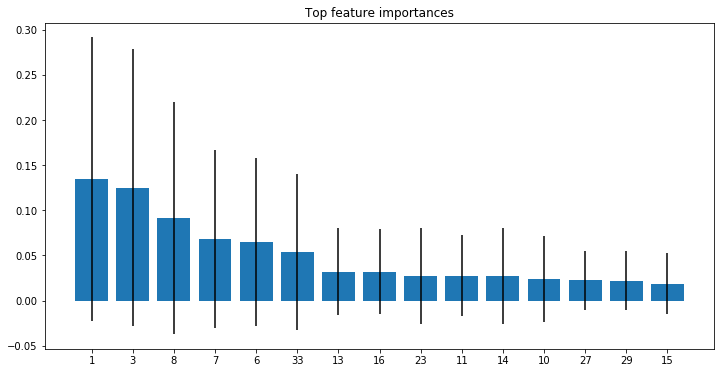

In [45]:
plt.figure()
plt.title('Top feature importances')
plt.bar(
    range(TOP_FEATURES), 
    importances[indices],
    yerr=std[indices], 
)
plt.xticks(range(TOP_FEATURES), indices)
plt.show()

In [ ]:
'''
#### List of all features
0. age_at_first_tbi           int64
#1. cerad                      int64
2. num_tbi_w_loc              int64
#3. braak                      int64
4. structure_id               int64
5. ihc_a_syn                float64
#6. ihc_tau2_ffpe            float64
#7. ihc_at8_ffpe             float64
#8. ihc_at8                  float64
9. ihc_ptdp_43_ffpe         float64
#10. ihc_a_beta_ffpe          float64
#11. ihc_a_beta               float64
12. ihc_iba1_ffpe            float64
#13. ihc_gfap_ffpe            float64
#14. ptau_ng_per_mg           float64
#15. vegf_pg_per_mg           float64
#16. ab42_over_ab40_ratio     float64
17. tnf_a_pg_per_mg          float64
18. tau_ng_per_mg            float64
19. il_10_pg_per_mg          float64
20. isoprostane_pg_per_mg    float64
21. il_6_pg_per_mg           float64
22. il_1b_pg_per_mg          float64
#23. ptau_over_tau_ratio      float64
24. il_4_pg_per_mg           float64
25. rantes_pg_per_mg         float64
26. ab40_pg_per_mg           float64
#27. a_syn_pg_per_mg          float64
28. ifn_g_pg_per_mg          float64
#29. mcp_1_pg_per_mg          float64
30. bdnf_pg_per_mg           float64
31. mip_1a_pg_per_mg         float64
32. il_7_pg_per_mg           float64
#33. ab42_pg_per_mg           float64
'''